In [9]:
from environment import *
from spotify import *
from genius import *
from lyric import *
import csv
import os
import re

os.makedirs('./lyrics', exist_ok=True)
os.makedirs('./data', exist_ok=True)

In [10]:
ARTIST_SEARCH = "kanye"

# ARTIST_SEARCH = str(input())

In [11]:
my_token = get_token()
artist_result = search_artist(token=my_token, artist_name=ARTIST_SEARCH)
# print(artist_result)

for idx,artist in enumerate(artist_result):
    print(f"{idx}: {artist['name']}")

# artisit_idx = int(input())
# print(f"{artist_result[artisit_idx]['name']}")

artist_idx = 0 # Default to 0
artist_id = artist_result[artist_idx]['id']
artist_name = artist_result[artist_idx]['name']
artist_image = artist_result[artist_idx]['images'][0]['url']

0: Kanye West
1: Yé
2: Kane Brown
3: Ye
4: Kany García
5: Ye
6: Kane Rodriguez
7: YE
8: Kangen Band
9: ¥$


Kanye West
5K4W6rqBFWDnAN6FQUkS6x
https://i.scdn.co/image/ab6761610000e5eb6e835a500e791bf9c27a422a


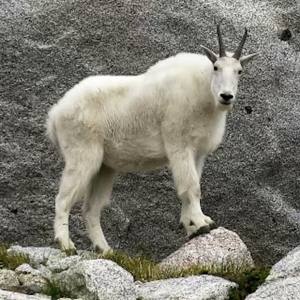

{'id': '5TRPicyLGbAF2LGBFbHGvO', 'name': 'Flashing Lights', 'album_name': 'Graduation', 'release_date': '2007/09/11', 'popularity': 86, 'image_url': 'https://i.scdn.co/image/ab67616d0000b27326f7f19c7f0381e56156c94a'}
{'id': '4EWCNWgDS8707fNSZ1oaA5', 'name': 'Heartless', 'album_name': '808s & Heartbreak', 'release_date': '2008/11/24', 'popularity': 86, 'image_url': 'https://i.scdn.co/image/ab67616d0000b273346d77e155d854735410ed18'}
{'id': '2McT2fkH0VDqPsbiB9HWPq', 'name': 'CARNIVAL', 'album_name': 'VULTURES 1', 'release_date': '2024/02/09', 'popularity': 84, 'image_url': 'https://i.scdn.co/image/ab67616d0000b2739c654f315df05ae7c6ec8980'}
{'id': '7rbECVPkY5UODxoOUVKZnA', 'name': 'I Wonder', 'album_name': 'Graduation', 'release_date': '2007/09/11', 'popularity': 84, 'image_url': 'https://i.scdn.co/image/ab67616d0000b27326f7f19c7f0381e56156c94a'}
{'id': '3DK6m7It6Pw857FcQftMds', 'name': 'Runaway', 'album_name': 'My Beautiful Dark Twisted Fantasy', 'release_date': '2010/11/22', 'popularity'

In [12]:
print(f"{artist_name}")
print(f"{artist_id}")
print(f"{artist_image}")
show_image(artist_image)

artist_top_tracks = search_top_tracks(token=my_token, artist_id=artist_id)
# print(artist_top_tracks)

top_tracks_data = process_top_track(artist_top_tracks)
# Preview the result (optional)
for t in top_tracks_data:
    print(t)

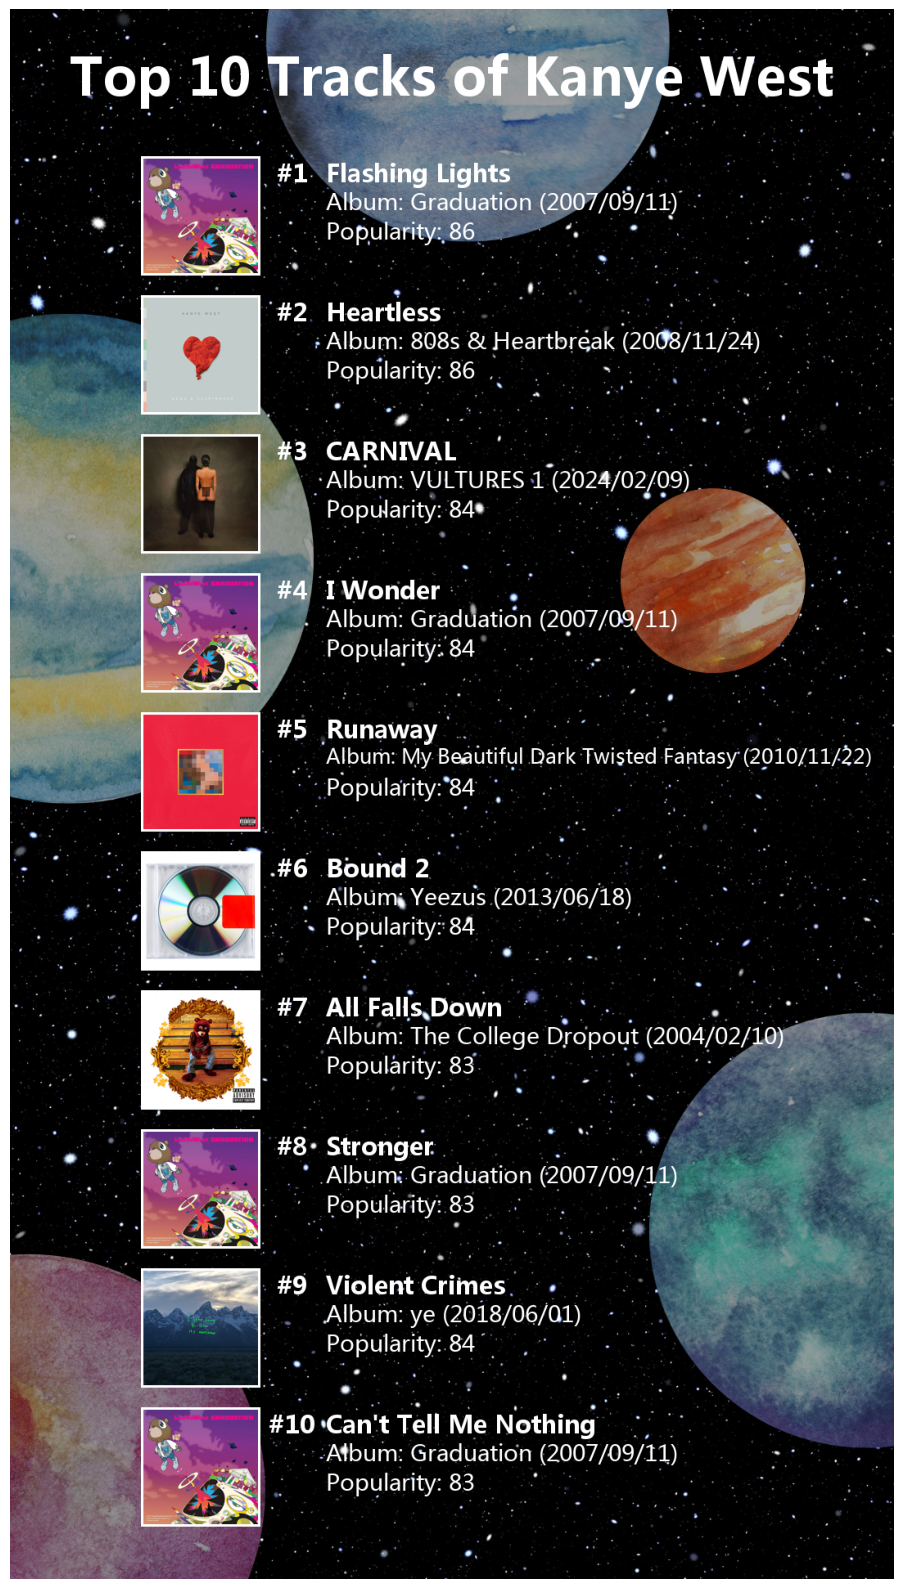

In [13]:
generate_top_tracks_image(
    background_path='./data/universe.png',
    top_tracks_data=top_tracks_data,
    artist_name=artist_name,
    textfont = "./data/msyh.ttc",
    textfont_bd = "./data/msyhbd.ttc",
    # textfont = "./data/AppleGaramond-Light.ttf",
    # textfont_bd = "./data/AppleGaramond-Bold.ttf",
    signature=False
)

In [14]:
# Define the lyric file path
lyric_file = f'./lyrics/{artist_name}.csv'

# Check if the lyric file for this artist already exists
if os.path.exists(lyric_file):
    print(f"Lyrics for {artist_name} already saved. Skipping.")
else:
    # Open CSV file and write headers and lyrics
    with open(lyric_file, mode='w', encoding='utf-8', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=['artist_name', 'song_name', 'album_name', 'lyric'])
        writer.writeheader()

        for track in top_tracks_data[:10]:
            song_name = track['name']
            album_name = track['album_name']

            # Try to fetch lyrics using Genius API
            try:
                lyric = get_lyrics(artist_name, song_name)
                lyric = re.sub(r'\[.*?\]', '', lyric)
            except Exception as e:
                lyric = f"[Error retrieving lyrics: {e}]"

            # Write track info to CSV
            writer.writerow({
                'artist_name': artist_name,
                'song_name': song_name,
                'album_name': album_name,
                'lyric': lyric
            })

    print(f"Lyrics for {artist_name} saved to {lyric_file}.")

Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Flashing Lights" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Heartless" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "CARNIVAL" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "I Wonder" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Runaway" by Kanye West...
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Bound 2" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "All Falls Down" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Stronger" by Kanye West...
Done.
Searching for songs by Kanye West...

Done. Found 0 songs.
Searching for "Violent Crimes" by Kanye West...
Done.
Searching for songs by Ka

In [15]:
top_5_words = get_top_5_words_from_lyrics(lyric_file=lyric_file)
print(top_5_words)

top_3_moods = calculate_mood_counts(lyric_file, top_n=3)
print(top_3_moods)

top_3_emotions = get_emotions(lyric_file, top_n=3)
print(top_3_emotions)

sentiment_distribution = sentiment_calculation(top_3_moods=top_3_moods, top_3_emotions=top_3_emotions)
print(sentiment_distribution)

[('told', 28), ('falls', 26), ('gon', 21), ('night', 19), ('stronger', 19)]
[('Romantic', 0.4), ('Angry', 0.3), ('Sad', 0.1)]
[('neutral', 9), ('anger', 8), ('fear', 5)]
[0.45, 0.55]


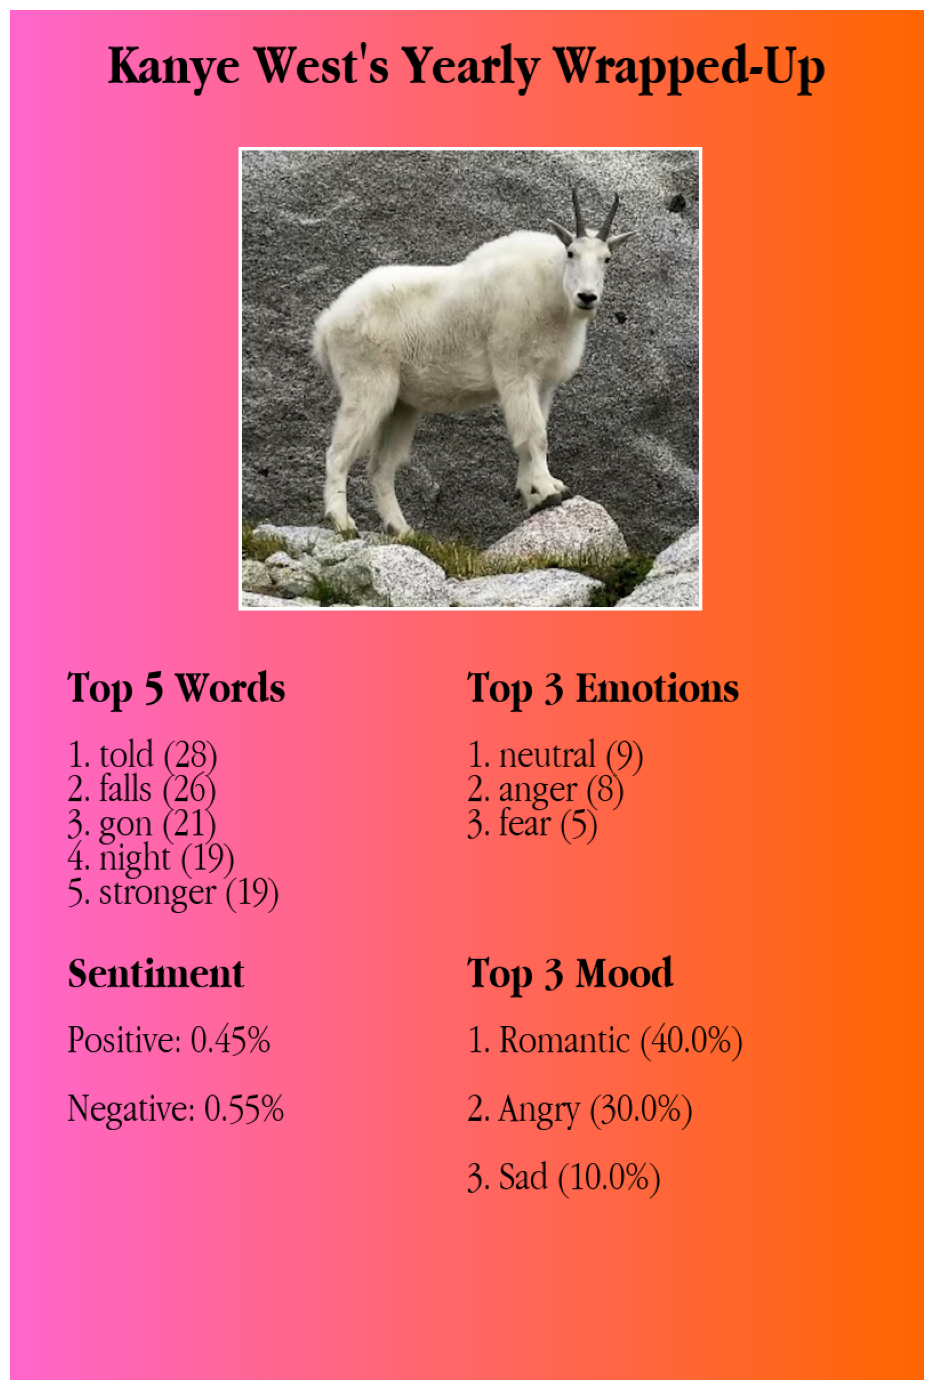

In [16]:
generate_yearly_summary_poster(
    artist_name=artist_name,
    artist_cover_url = artist_image,
    top_5_words = top_5_words,
    top_3_emotions = top_3_emotions,
    top_3_moods = top_3_moods,
    sentiment_distribution = sentiment_distribution,
    font_path_bold="./data/AppleGaramond-Bold.ttf",
    font_path_light="./data/AppleGaramond-Light.ttf",
)